# Examples of Paired Transforms in `PyTorch 0.3`

This notebook showcases the effect of applying paired transforms on (image, ground-truth) pairs. Feel free to click on each of the links below to jump directly to each example. The last section provides you with an example on how to build a `PyTorch` dataloader making use of paired transforms:

# Table Of Contents
* [Paired Transforms](#paired_transforms)
    * [`Resize`](#resize)
    * [`CenterCrop`](#center_crop)
    * [`RandomCrop`](#random_crop)
    * [`RandomHorizontalFlip`](#random_horizontal_flip)
    * [`RandomVerticalFlip`](#random_vertical_flip)
    * [`RandomResizedCrop`](#random_resized_crop)
    * [`FiveCrop`](#five_crop)
    * [`TenCrop`](#ten_crop)
    * [`RandomRotation`](#random_rotation)
    * [`Compose`](#compose)
    * [`ToTensor`](#to_tensor)
    * [`ToPILImage`](#to_PILimage)
* [Non-pairable transforms](#non_paired_transforms)
    * [`ColorJitter`](#color_jitter)
    * [`Grayscale`](#grayscale)
    * [`RandomGrayscale`](#random_grayscale)
    * [`LinearTransformation`](#linear_transformation)
* [Unmodified Classes](#unmodified)    
* [Example: Building a Dataloader with Paired Transforms](#example)  
    * [`Dataset`](#dataset)
    * [`DataLoader`](#dataloader)

In [1]:
import os
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
%load_ext autoreload 
%autoreload 2

import paired_transforms_pt03 as p_tr

In [2]:
# load image and labels with PIL
image = Image.open('images/luppo_and_more.png') # PIL image in [0,255], 3 channels
gdt = Image.open('images/labels.png') # PIL image in {0,255}, 3 channels

In [3]:
def imshow_pair(im, gdt):
    f, ax = plt.subplots(1, 2, figsize=(12,6))
    np_im = np.asarray(im)
    np_gdt = np.asarray(gdt)
    if len(np_im.shape) == 2:
        ax[0].imshow(np_im, cmap='gray'),  ax[0].axis('off')
    else:
        ax[0].imshow(np_im),  ax[0].axis('off')
    if len(np_gdt.shape) == 2:
        ax[1].imshow(np.asarray(gdt), cmap = 'gray'), ax[1].axis('off')
    else:
        ax[1].imshow(np.asarray(gdt)), ax[1].axis('off')
    plt.tight_layout()

In [4]:
def imshow_pair_list(im_l, gdt_l):
    n_pairs = len(im_l)
    f, ax = plt.subplots(2, n_pairs, figsize=(n_pairs*n_pairs, 2*n_pairs))
    for i in range(n_pairs):
        ax[0, i].imshow(np.asarray(im_l[i])),  ax[0,i].axis('off') 
        ax[1, i].imshow(np.asarray(gdt_l[i])), ax[1,i].axis('off') 
    plt.tight_layout()

<a id='paired_transforms'></a>

# Pairable Transforms
Below we go throgh all the different classes that have been extended to handle two inputs.
<a id='resize'></a>

## `Resize()`

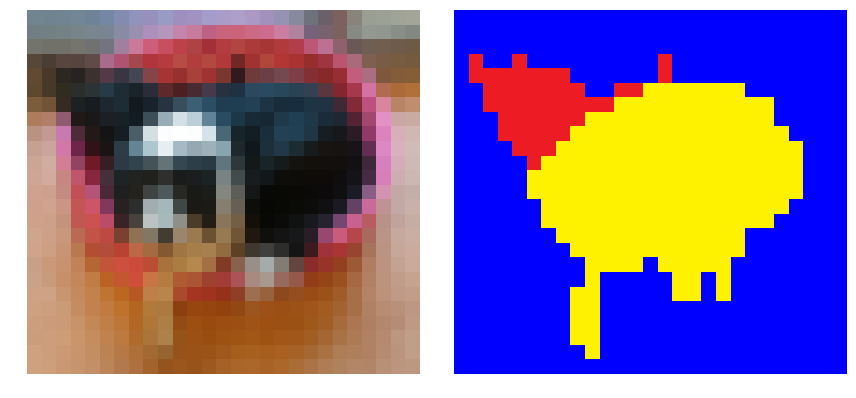

In [5]:
resize_paired = p_tr.Resize(25)
resized_pair = resize_paired(image, gdt)
imshow_pair(*resized_pair)

Note that we implement nearest neighbor interpolation in the groundtruth and bicubic in the image.
<a id='center_crop'></a>

## `CenterCrop()`

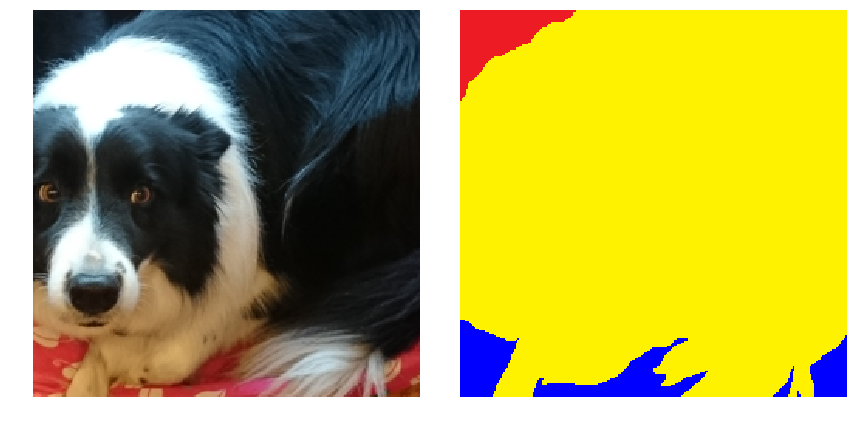

In [6]:
center_crop_paired = p_tr.CenterCrop(250)
center_cropped_pair = center_crop_paired(image, gdt)
imshow_pair(*center_cropped_pair)

<a id='random_crop'></a>

## `RandomCrop()`

71 0 250 250


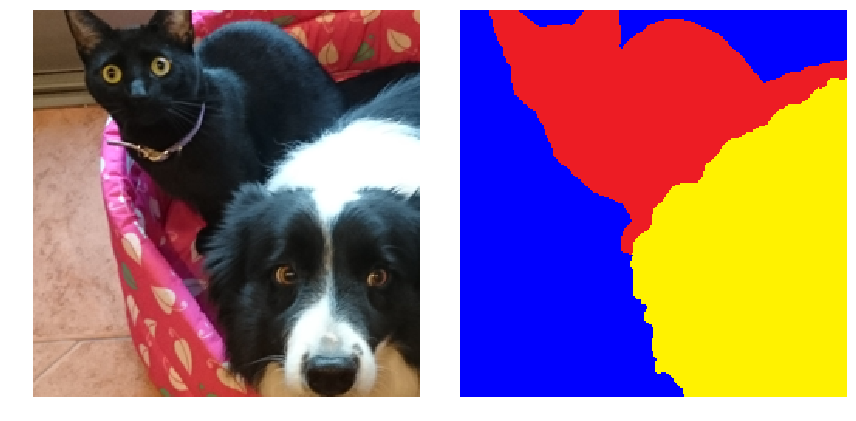

In [7]:
random_crop_paired = p_tr.RandomCrop(250)
random_cropped_pair = random_crop_paired(image, gdt)
imshow_pair(*random_cropped_pair)

<a id='random_horizontal_flip'></a>

## `RandomHorizontalFlip()`

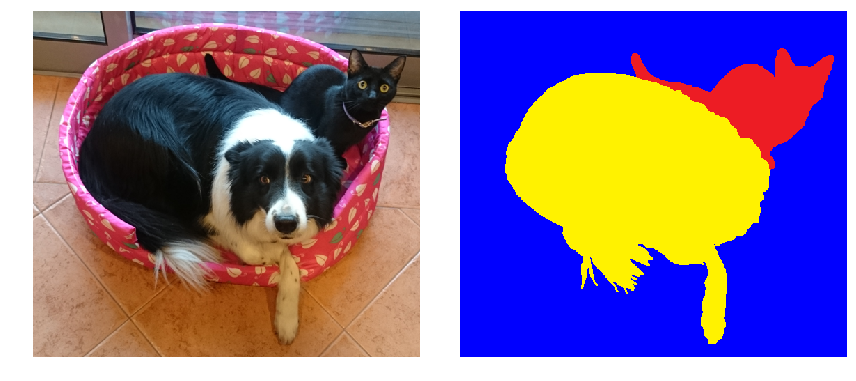

In [8]:
random_hor_flip_paired = p_tr.RandomHorizontalFlip()
random_flipped_pair = random_hor_flip_paired(image, gdt)
imshow_pair(*random_flipped_pair)

<a id='random_vertical_flip'></a>

## `RandomVerticalFlip()`

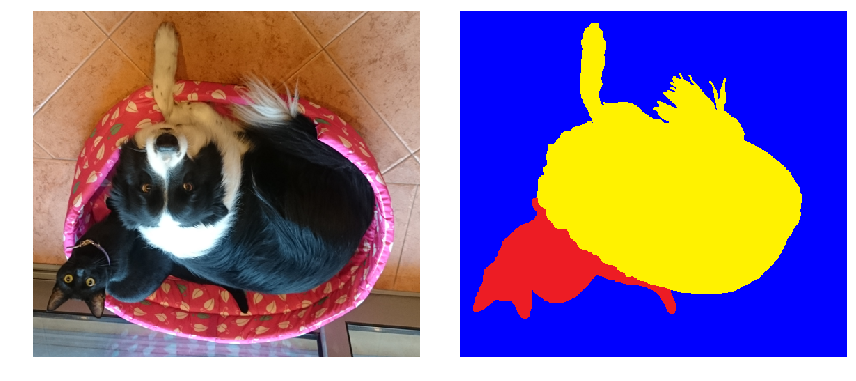

In [9]:
random_ver_flip_paired = p_tr.RandomVerticalFlip()
random_flipped_pair = random_ver_flip_paired(image, gdt)
imshow_pair(*random_flipped_pair)

<a id='random_resized_crop'></a>

## `RandomResizedCrop()`

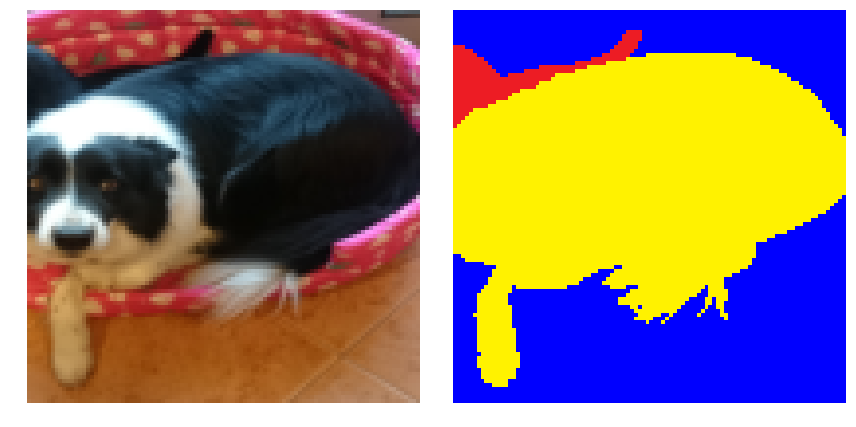

In [10]:
random_res_crop_paired = p_tr.RandomResizedCrop(100, (0.5, 0.6), (2./3., 3./4.))
random_resized_cropped_pair = random_res_crop_paired(image, gdt)
imshow_pair(*random_resized_cropped_pair)

<a id='five_crop'></a>

## `FiveCrop()`

In [11]:
size = 250
five_cropper = p_tr.FiveCrop(size)
im_l, gt_l = five_cropper(image, gdt)

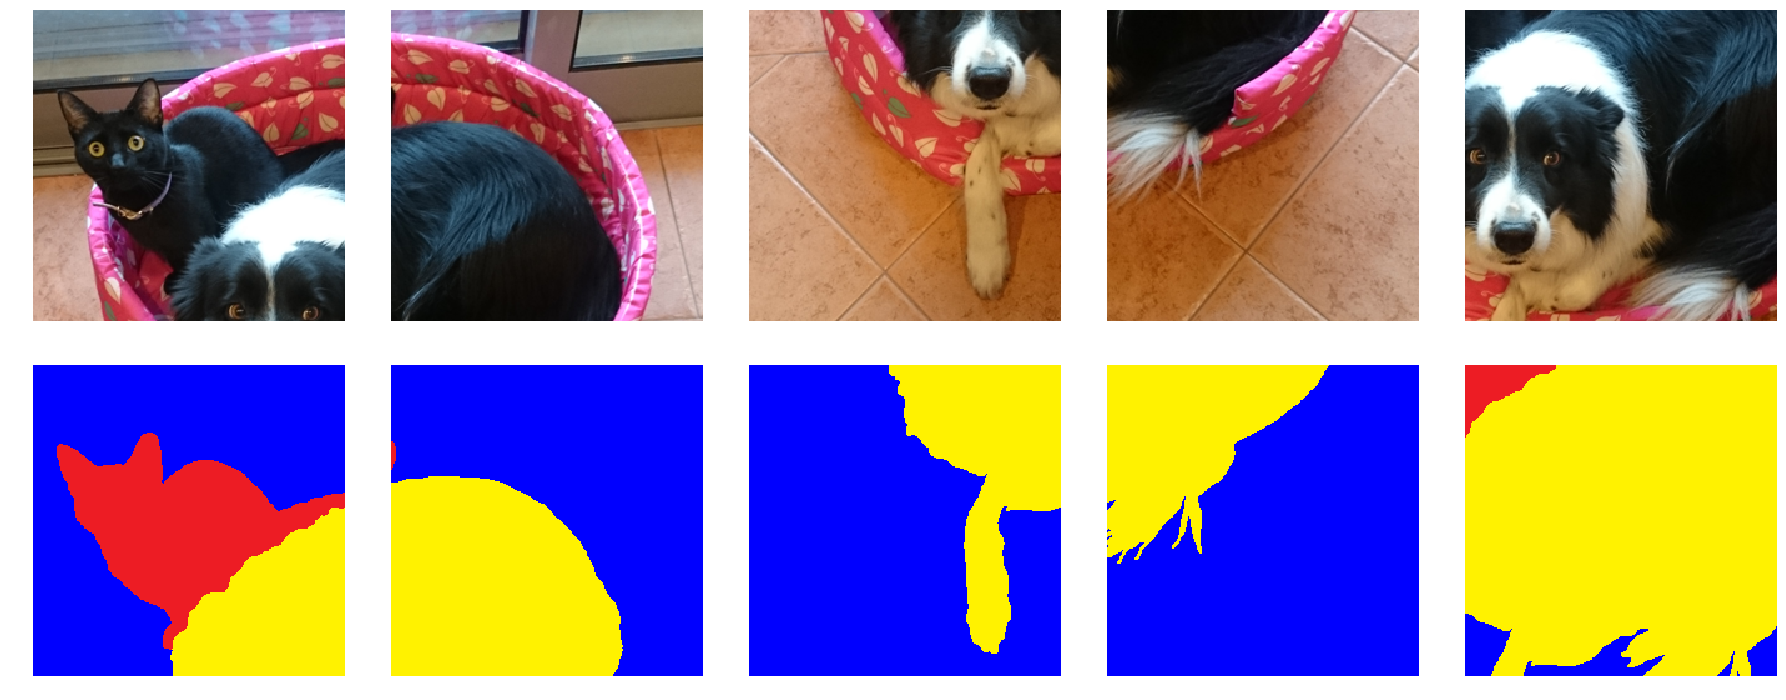

In [12]:
imshow_pair_list(im_l, gt_l)

<a id='ten_crop'></a>

## `TenCrop()`

In [13]:
size = 250
ten_cropper = p_tr.TenCrop(size)
im_l, gt_l = ten_cropper(image, gdt)

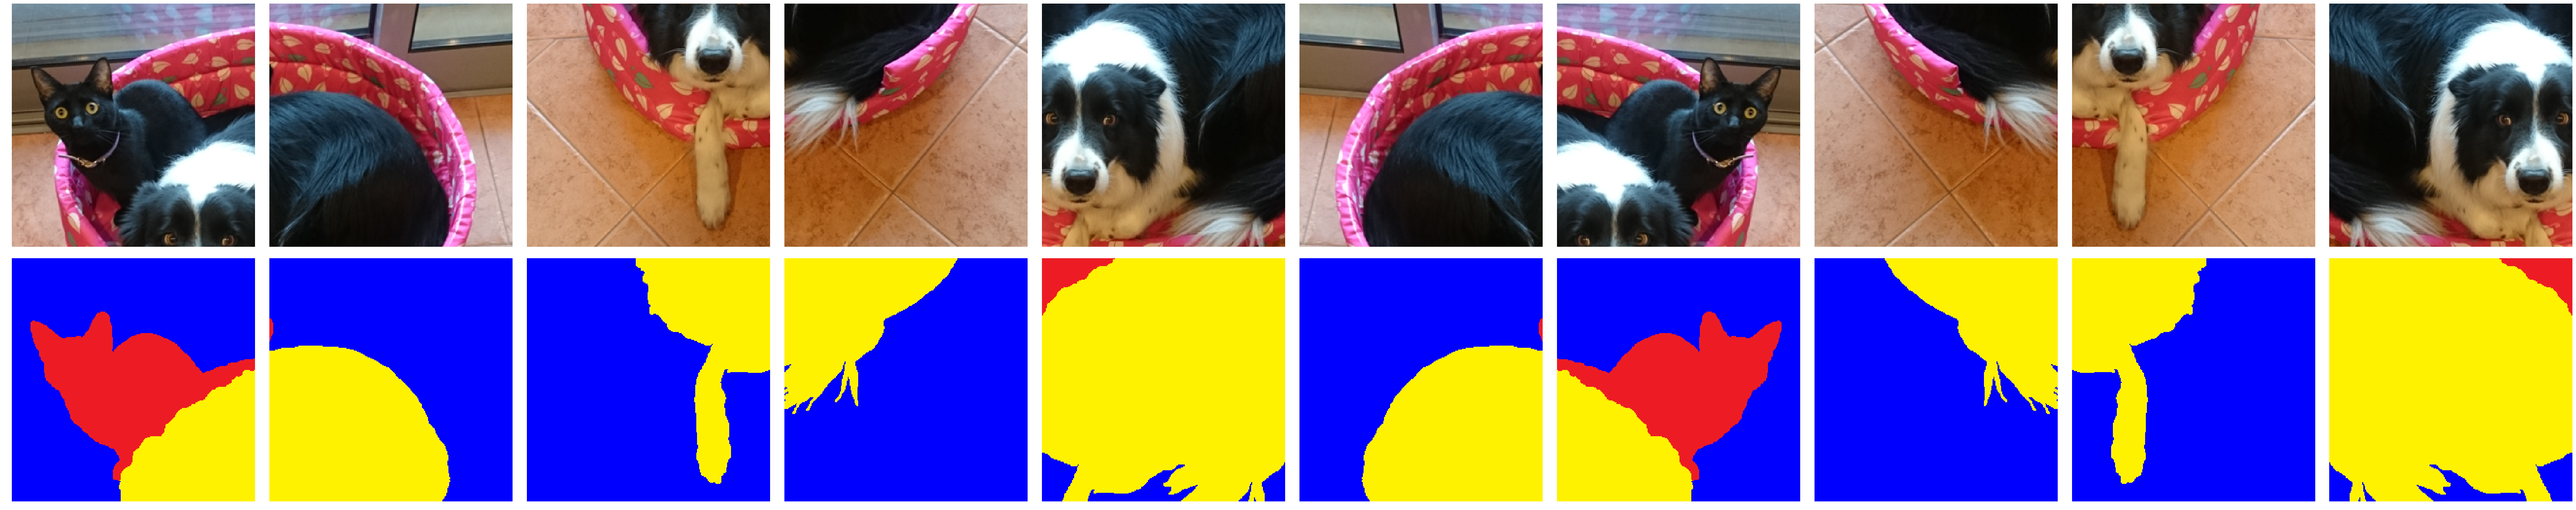

In [14]:
imshow_pair_list(im_l, gt_l)

<a id='random_rotation'></a>

## `RandomRotation()`

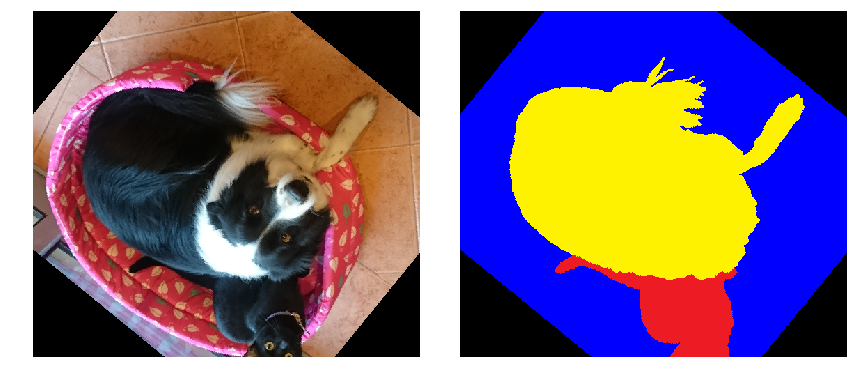

In [15]:
degrees=(0,180)
rotate_paired = p_tr.RandomRotation(degrees)
rotated_pair = rotate_paired(image, gdt)
imshow_pair(*rotated_pair)

<a id='compose'></a>

## `Compose`:

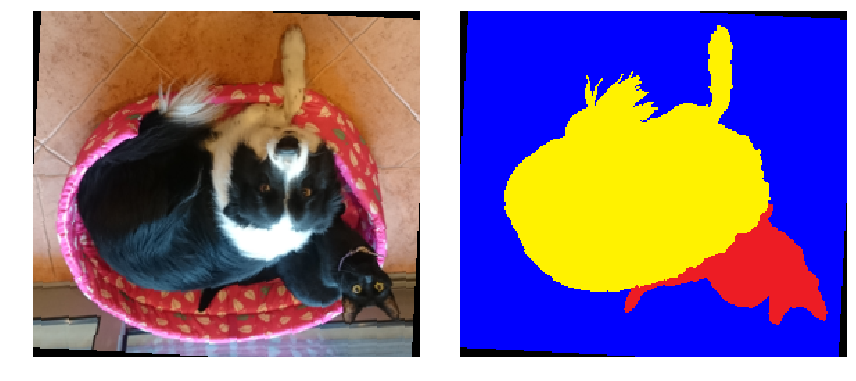

In [16]:
degrees=(90,180)
composed_paired_tr = p_tr.Compose([p_tr.Resize(250), p_tr.RandomRotation(degrees)])
image_tr, gdt_tr = composed_paired_tr(image, gdt)
imshow_pair(image_tr, gdt_tr)

<a id='to_tensor'></a>

## `ToTensor`:

In [17]:
tt = p_tr.ToTensor()
img_tnsr, gdt_tnsr = tt(image, gdt)
type(img_tnsr), type(gdt_tnsr)

(torch.FloatTensor, torch.FloatTensor)

<a id='to_PILimage'></a>

## `ToPILImage`:

In [18]:
tp = p_tr.ToPILImage()
img_2, gdt_2 = tp(img_tnsr, gdt_tnsr)
type(img_2), type(gdt_2)

(PIL.Image.Image, PIL.Image.Image)

<a id='non_paired_transforms'></a>

# Non-pairable transforms:
The transforms below are not intended to be applied to the ground-truth image, and hence they would raise an exception if you attempt to pass a pair (image, ground-truth). However, they can be succesfully applied if the input is a single image.

In this extended version, these transforms will return the modified version of the image, but the target (second argument) will remain the same.
<a id='color_jitter'></a>

## `ColorJitter()`

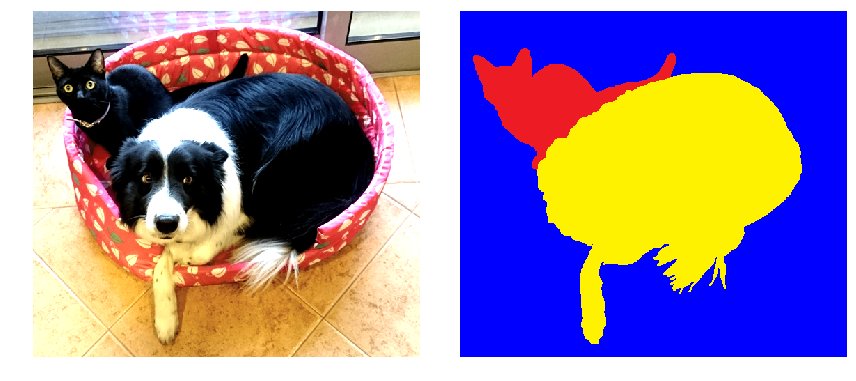

In [19]:
brightness, contrast, saturation, hue = 0.5, 0.5, 0.5, 0.05
jitter_paired = p_tr.ColorJitter(brightness, contrast, saturation, hue)
jittered_pair = jitter_paired(image, gdt)
imshow_pair(*jittered_pair)

<a id='grayscale'></a>

## `Grayscale()`

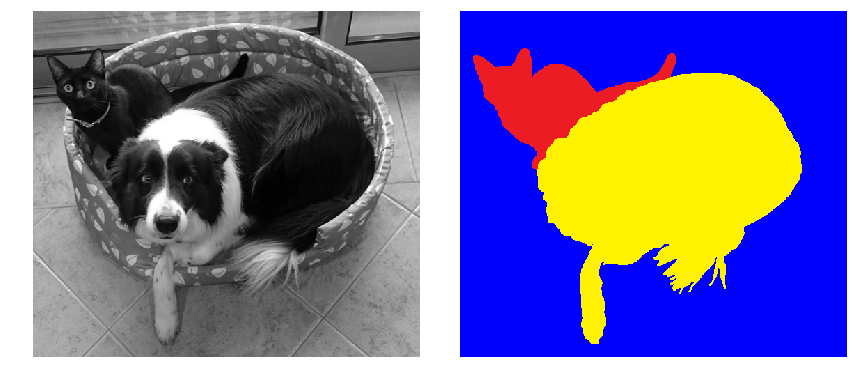

In [20]:
n_channels = 1
grayscale_paired = p_tr.Grayscale(n_channels)
grayscale_pair = grayscale_paired(image, gdt)
imshow_pair(*grayscale_pair)

<a id='random_grayscale'></a>

## `RandomGrayscale()`

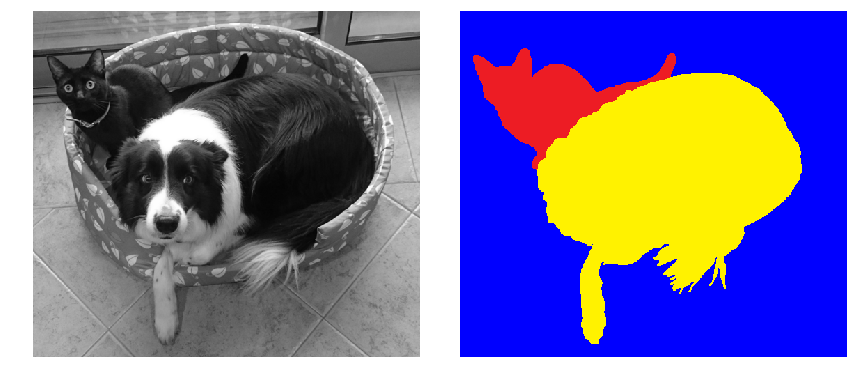

In [21]:
gray_prob = 0.5
rand_grayscale_paired = p_tr.RandomGrayscale(gray_prob)
rand_grayscale_pair = rand_grayscale_paired(image, gdt)
imshow_pair(*rand_grayscale_pair)

<a id='linear_transformation'></a>

## `LinearTransformation()`

`LinearTransformation` is not available as a paired transformation, and it will raise an exception if you attempt to use it with a pair images:

In [22]:
import torch

In [23]:
from torchvision.transforms import LinearTransformation as lt
from torchvision.transforms import ToTensor
tt = ToTensor()

Note: This below is not the way to use `LinearTransformation`, it's just for illustrative purposes

In [24]:
tr_mt = torch.randn(3*20*20, 3*20*20)
lin_tr = lt(tr_mt)
transformed = lin_tr(tt(image.resize((20,20))))

In [25]:
tr_mt = torch.randn(3*20*20, 3*20*20)

In [26]:
# this raises a NotImplementedError
# lin_tr_paired = p_tr.LinearTransformation(tr_mt)
# transformed_pair = lin_tr_paired(tt(image.resize((20,20))), tt(gdt.resize((20,20))))

<a id='unmodified'></a>

# Unmodified classes:

`Normalize`, `Pad`, and `Lambda` are not implemented differently than standard `PyTorch` transforms.
<a id='example'></a>

# Example: Building a Dataloader with Paired Transforms
<a id='dataset'></a>

## Dataset:
Let us first build a `pytorch` dataset holding only an image and its related ground-truth:

In [27]:
from torch.utils.data.dataset import Dataset

class data(Dataset):
    def __init__(self, root_dir='images/', transforms = None):
        self.root_dir = root_dir
        self.im_names = ['luppo_and_more.png']
        self.gt_names = ['labels.png']
        self.transforms = transforms

    def __getitem__(self, index):
        im_name = os.path.join(self.root_dir, self.im_names[index])
        gt_name = os.path.join(self.root_dir, self.gt_names[index]) 
                
        image = Image.open(im_name) 
        gt = Image.open(gt_name) 

        # If transforms are provided
        if self.transforms is not None:
            image, gt = self.transforms(image, gt)
                       
        return image, gt

    def __len__(self):
        return len(self.im_names)

Now we can define a series of paired transforms to be applied to this pair of images before retrieving them from the dataset:

In [28]:
# parameters defining the different transforms
rotate_range = 30
crop_size = 400
brightness, contrast, saturation, hue = 0.5, 0.5, 0.5, 0.05

Now we define the transforms. Note that we do this using the transforms from the `paired_transforms` module, rather than from `torchvision.transforms`.

In [29]:
# paired transforms
rotate = p_tr.RandomRotation(rotate_range)
random_crop = p_tr.RandomCrop(crop_size)
h_flip = p_tr.RandomHorizontalFlip()
jitter = p_tr.ColorJitter(brightness, contrast, saturation, hue)

Finally, we compose all the defined transforms into a list. Note that `Compose` comes also from the `paired_transforms` module, since it is meant to compose paired transformations.

In [30]:
# composed paired transforms
transforms = p_tr.Compose([jitter, random_crop, rotate, h_flip])

The dataset can now be instantiated. 

In [31]:
dataset = data('images/', transforms)

Since we are not passing a `ToTensor` transform, we get back `numpy` arrays that can be inspected (plotted) without additional operations:

20 13 400 400


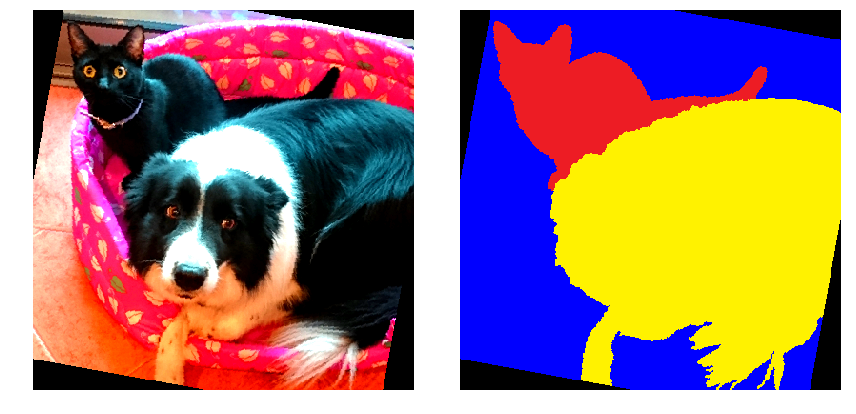

In [32]:
img, gt = dataset[0]
imshow_pair(img, gt)

<a id='dataloader'></a>

## DataLoader:
Let us build a dataloader that we can use for training a neural network. The dataset is the same as above, but the transforms now include a `ToTensor` operation, which also comes from the `paired_transforms` module.

In [33]:
transforms = p_tr.Compose([jitter, random_crop, rotate, h_flip, p_tr.ToTensor()])
paired_dataset = data('images/', transforms)

With this dataset, we can instantiate a dataloader:

In [34]:
from torch.utils.data import DataLoader

paired_loader = DataLoader(dataset=paired_dataset)

To check if everything works as expected, let us get a batch out of it and inpsect its size:

In [35]:
batch_index, (im_batch, labels_batch) = next(enumerate(paired_loader))
batch_index, im_batch.size(), labels_batch.size()

71 67 400 400


(0, torch.Size([1, 3, 400, 400]), torch.Size([1, 3, 400, 400]))

In this case, to visually inspect the result, we first need to transform these two tensors into PIL images. This can be done with the `ToPILImage` class; and if you use the extended version from `paired_transforms`, you can pass directly a tuple of tensors to it:

In [36]:
to_pil_im = p_tr.ToPILImage()

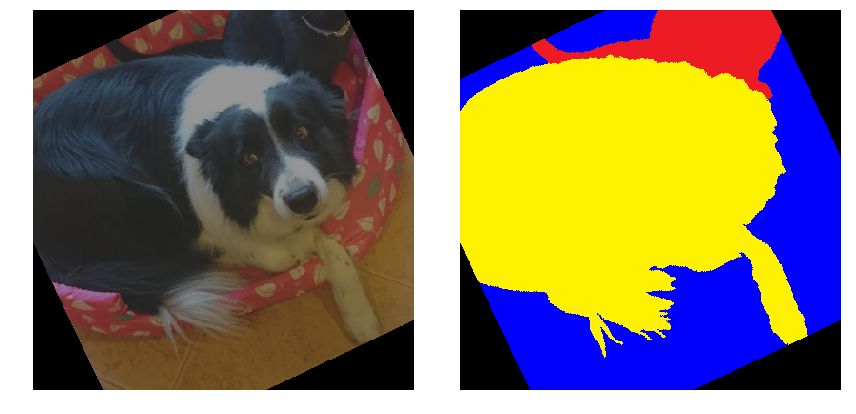

In [37]:
imshow_pair(*to_pil_im(im_batch[0], labels_batch[0]))